In [1]:
import sys
if not '..' in sys.path:
    sys.path.append('..')

In [2]:
from analysis import collection, analysis
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
%matplotlib inline

### Visualize trajectories from a given trial

/Users/spencer/phd/phd/analysis/notebooks/../analysis/analysis.py:93: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "ko" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(np.cos(theta), np.sin(theta), style, marker=m, markersize=markersize, color="grey")
/Users/spencer/phd/phd/analysis/notebooks/../analysis/analysis.py:93: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ko" (-> color='k'). The keyword argument will take precedence.
  ax.plot(np.cos(theta), np.sin(theta), style, marker=m, markersize=markersize, color="grey")


Text(0.5, 0, 'Worst Performer')

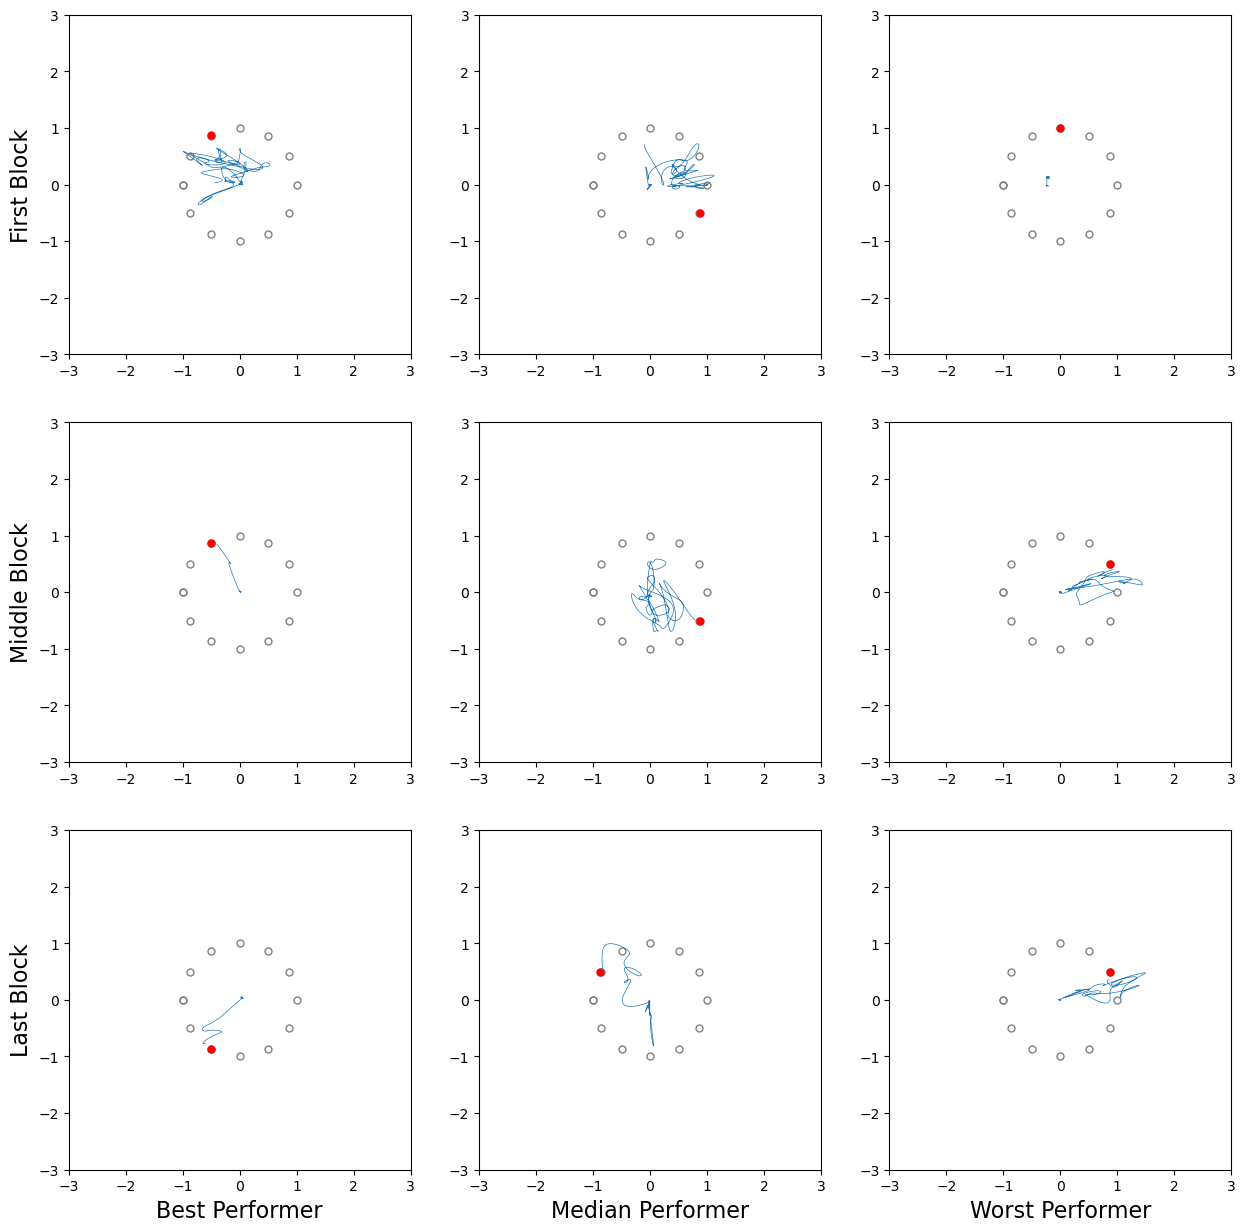

In [3]:
collection_name = "emg_olympics"
subject_name = "alba"
task_name = "center_hold"
session_name = "session_1"
trial_number = 1

subjects = ["morio", "holly", "hyewon"]

behavior_fig, axes = plt.subplots(3,3, figsize=(15,15))
for ax in axes.flatten():
    ax.set_xlim([-3,3])
    ax.set_ylim([-3,3])

sessions = [0,22,44]
for col, subject_name in enumerate(subjects):
    for row in range(3):
        s = collection.Session(collection_name, subject_name, task_name, f"session_{sessions[row]}")
        trial = s.sorted_trials()[trial_number]
        trial.get_trajectory()
        t = trial.trajectory
        target_loc = [s.outcome_array[trial_number][-2], s.outcome_array[trial_number][-1]]
        analysis.plot_targets(axes[row,col], target=target_loc)
        axes[row,col].plot(t[:,-2],t[:,-1], linewidth=0.5)

axes[0,0].set_ylabel("First Block", fontsize=16)
axes[1,0].set_ylabel("Middle Block", fontsize=16)
axes[2,0].set_ylabel("Last Block", fontsize=16)
axes[2,0].set_xlabel("Best Performer", fontsize=16)
axes[2,1].set_xlabel("Median Performer", fontsize=16)
axes[2,2].set_xlabel("Worst Performer", fontsize=16)

In [6]:
# behavior_fig.savefig("/Users/spencer/motor-control/thesis/images/data_analysis2023/behavior.pdf", dpi=300, format="pdf")